In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_raw_1 = pd.read_csv('goodreads/books_d.csv')
data_raw_2 = pd.read_csv('goodreads/books_q.csv')
data_raw_3 = pd.read_csv('goodreads/books_m.csv')

In [3]:
data = pd.concat([data_raw_1, data_raw_2, data_raw_3])
len(data)

456032

In [4]:
avg_rating = data['Rate']
avg_rating.head()

0    4.57
1    4.50
2    4.47
3    4.43
4    4.57
Name: Rate, dtype: float64

In [5]:
clean_v1 = data[~data.GenreLink.isnull()]

len(clean_v1)

281522

In [6]:
clean_v2 = clean_v1[clean_v1["Raters"] > 100]
len(clean_v2)

174894

In [7]:
clean_v3 = clean_v2[clean_v2["Pages"] > 0]
len(clean_v3)

152079

In [8]:
clean_v4 = clean_v3.drop_duplicates(subset="GenreLink")
len(clean_v4)

97618

In [9]:
conditions = [
    (clean_v4['Rate'] < 3.2),
    (clean_v4['Rate'] >= 3.2) & (clean_v4['Rate'] < 3.8),
    (clean_v4['Rate'] >= 3.8) 
    ]

values = [0, 1, 2]

# create a new column and use np.select to assign values to it using our lists as arguments
clean_v4['review'] = np.select(conditions, values)

clean_v4.head()

C:\Users\Dell\Desktop\Data Science\ds\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,BookID,Title,Author,Rate,Raters,Reviewers,Pages,PublishYear,GenreLink,Series,review
0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57,2469197,40043,652.0,2005,/work/shelves/41335427,Harry Potter,2
1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré",4.50,2541611,43067,870.0,2003,/work/shelves/2809203,Harry Potter,2
2,3,Harry Potter and the Sorcerer's Stone,"J.K. Rowling, Mary GrandPré",4.47,7145889,113905,309.0,1997,/work/shelves/4640799,Harry Potter,2
3,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,4.43,2766218,53651,352.0,1998,/work/shelves/6231171,Harry Potter,2
4,5,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling, Mary GrandPré",4.57,2849671,56337,435.0,1999,/work/shelves/2402163,Harry Potter,2


In [10]:
clean_v5 = clean_v4[clean_v4['PublishYear'].str.isdigit()]
clean_v5 = clean_v5.astype({'PublishYear': 'int32'})

In [11]:
clean_v5.to_csv('data/book_data.csv', index=False)

In [12]:
reviews = clean_v5.review.unique()
reviews = np.sort(reviews)

reviews

array([0, 1, 2])

In [13]:
books_by_rating = clean_v5.groupby('review').size().to_list()
books_by_rating

[1349, 29240, 67017]

C:\Users\Dell\Desktop\Data Science\ds\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


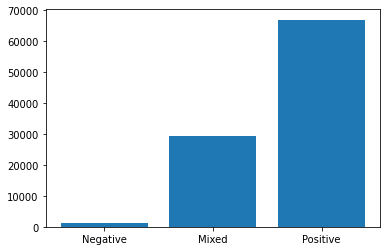

In [14]:
plt.bar(reviews, books_by_rating)

names = ['Negative', 'Mixed', 'Positive']

ax = plt.subplot()
ax.set_xticks(range(len(reviews)))
ax.set_xticklabels(names)

plt.show()